## **Developer Salary Estimator - Data Exploration**
##### **Author:** Topaz Montague
##### **Deliverable Description:** The purpose of the Data Exploration deliverable in the salary estimator project aims to provide a comprehensive initial analysis of the dataset, encompassing descriptive statistics, visual analysis, and key insights from exploratory data analysis (EDA). This deliverable includes summarizing key salary-related measures such as average compensation, distribution of salaries across job roles, experience levels, and demographic factors. Through visualizations and statistical summaries, we identify patterns, trends, and outliers that may influence salary disparities, enabling a deeper understanding of the spread and central tendencies within the developer salary data. This foundational analysis informs feature selection, highlights relationships among variables, and guides the modeling approach necessary to build an accurate salary prediction tool.

##### **Project Artifacts:**

GitHub Repository Link: [Developer Salary GitHub Repository](https://github.com/tfmontague/developer-salary-capstone)

Overleaf Project Report: [Developer Salary Overleaf Project Report](https://www.overleaf.com/read/kvnwjkgcfwkp#49128f)

Shiny App Dashboard: [Developer Salary Shiny App Dashboard](https://shiny.posit.co/py/)

##### **Import Dependencies**

In [52]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### **Load the Data Files**

In [53]:
from IPython.display import display

# Load Stack Overflow data
dev_survey_df = pd.read_csv("data/cleaned/Transformed_Developer_Survey_Data.csv", low_memory=False)

# Load BLS data
bls_df = pd.read_csv("data/cleaned/Transformed_bls2023_dl.csv")

# Display the first few rows of each dataset
display(dev_survey_df.head())
display(bls_df.head())


,ResponseId,Age Range,RemoteWork,EdLevel,YearsCode,DevType,OrgSize,Country,ICorPM,WorkExp,...,Database_Oracle,Database_PostgreSQL,Database_Presto,Database_RavenDB,Database_Redis,Database_SQLite,Database_Snowflake,Database_Solr,Database_Supabase,Database_TiDB
0,390,30,Remote,Some college,7,Student,15,United States of America,Individual contributor,8,...,No,No,No,No,No,Yes,No,No,No,No
1,399,50,Remote,Some college,38,"Developer, full-stack",2500,United States of America,Individual contributor,30,...,No,Yes,No,No,No,No,Yes,No,No,No
2,417,40,Remote,Masters,21,"Developer, back-end",250,Brazil,Individual contributor,17,...,No,Yes,No,No,No,No,No,No,No,No
3,427,20,Remote,Bachelors,9,"Developer, embedded applications or devices",2500,Ukraine,Individual contributor,4,...,No,No,No,No,No,No,No,No,No,No
4,429,30,Remote,Bachelors,20,"Engineer, site reliability",250,United States of America,Individual contributor,15,...,No,No,No,No,Yes,Yes,No,No,No,No


,State,Title,Size,AvgSalary
0,Alabama,Computer Programmers,1860,97020
1,Alabama,Software Developers,17130,110630
2,Alabama,Software Quality Assurance Analysts and Testers,1850,101520
3,Alabama,Web Developers,1120,66750
4,Alabama,Web and Digital Interface Designers,150,54470


##### **Descriptive Statistics for Stack Overflow Developer Survey Data**

Summary Statistics

In [54]:
# Set pandas to display floats in standard notation
pd.options.display.float_format = '{:.2f}'.format

# Generate summary statistics
dev_survey_summary = dev_survey_df.describe()
dev_survey_summary

,ResponseId,Age Range,WorkExp,TotalComp
count,8544.00,8544.00,8544.00,8544.00
mean,29970.17,36.88,8.97,142913.73
std,17482.87,10.93,10.30,137418.80
min,390.00,16.00,0.00,3500.00
25%,15909.75,30.00,0.00,100000.00
50%,29552.50,40.00,6.00,140000.00
75%,44414.50,40.00,14.00,150000.00
max,65271.00,70.00,50.00,9000000.00


Categorical Data Counts

In [55]:
# Distribution of Developer Types
dev_survey_df['DevType'].value_counts()

DevType
Developer, full-stack                            3117
Developer, back-end                              1537
Developer, front-end                              408
Developer, desktop or enterprise applications     354
Other                                             290
Developer, embedded applications or devices       280
Engineering manager                               275
Data engineer                                     234
Developer, mobile                                 232
Data scientist or machine learning specialist     182
DevOps specialist                                 154
Research & Development role                       154
Senior Executive (C-Suite, VP, etc.)              152
Cloud infrastructure engineer                     134
Academic researcher                               105
Developer, QA or test                              99
Data or business analyst                           91
Developer, AI                                      78
Developer, game or g

Visualize Salary Distribution

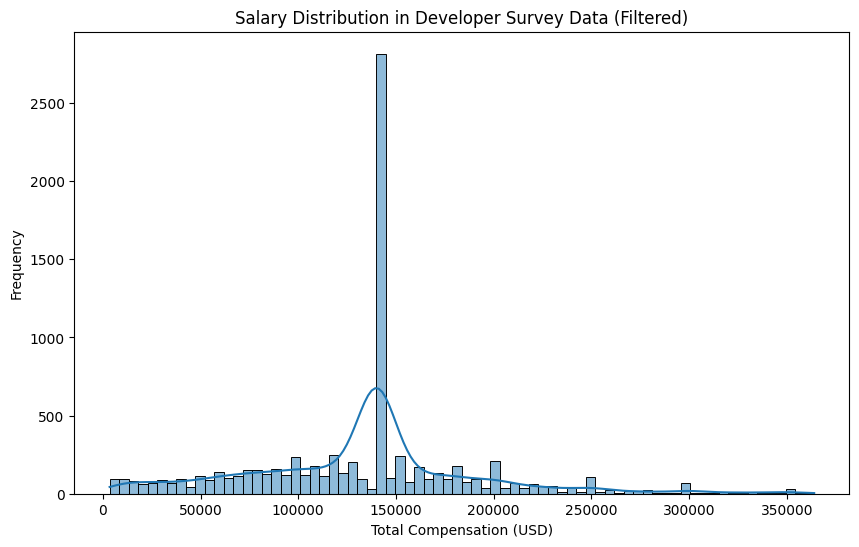

In [56]:
# Remove outliers for better visualization (keeping salaries below a threshold of 375000)
filtered_df = dev_survey_df[dev_survey_df['TotalComp'] < 375000]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['TotalComp'], kde=True)
plt.title("Salary Distribution in Developer Survey Data (Filtered)")
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Frequency")
plt.show()



Visualize Years of Work Experience

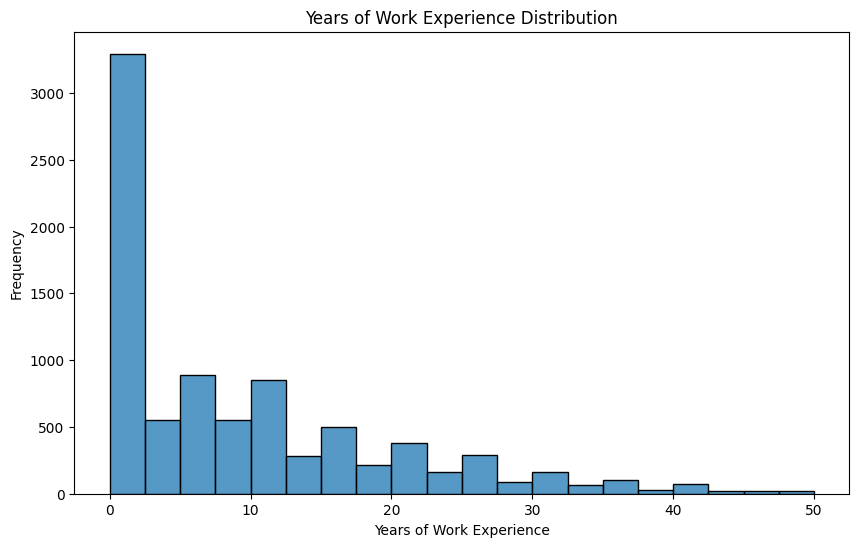

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(dev_survey_df['WorkExp'], bins=20, kde=False)
plt.title("Years of Work Experience Distribution")
plt.xlabel("Years of Work Experience")
plt.ylabel("Frequency")
plt.show()



Visualize Years of Coding Experience

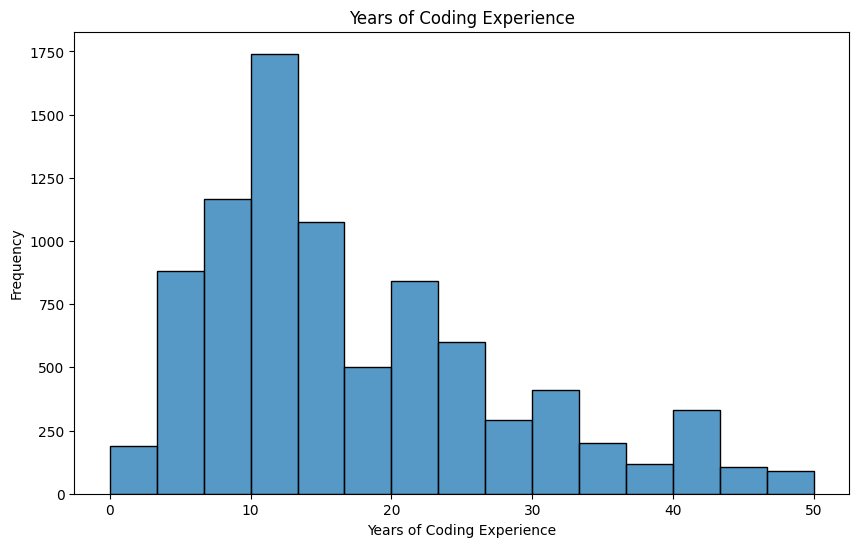

In [58]:
# Replace non-numeric values in YearsCode
dev_survey_df['YearsCode'] = dev_survey_df['YearsCode'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50
})

# Convert the column to numeric
dev_survey_df['YearsCode'] = pd.to_numeric(dev_survey_df['YearsCode'], errors='coerce')

# Plot the histogram with adjusted bins
plt.figure(figsize=(10, 6))
sns.histplot(dev_survey_df['YearsCode'], bins=15, kde=False)
plt.title("Years of Coding Experience")
plt.xlabel("Years of Coding Experience")
plt.ylabel("Frequency")
plt.show()


Visualize Average Company Size

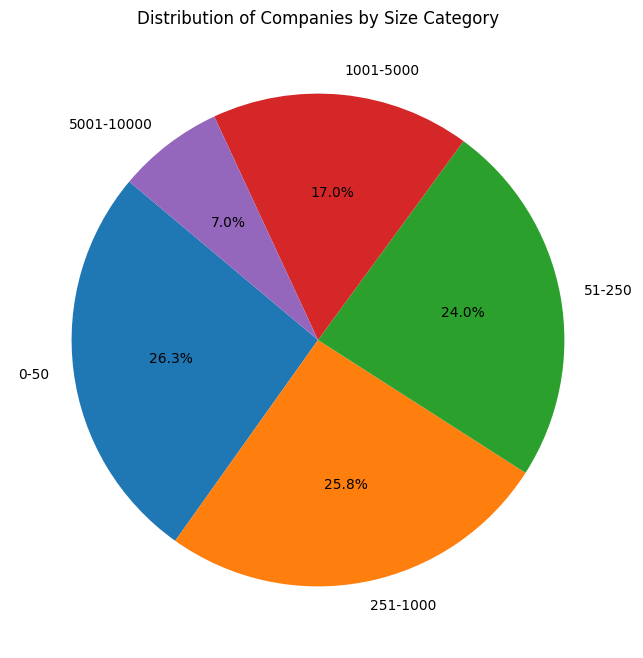

In [59]:
# Define custom bins and labels for company sizes
dev_survey_df['OrgSize'] = pd.to_numeric(dev_survey_df['OrgSize'], errors='coerce')
bins = [0, 50, 250, 1000, 5000, 10000]
labels = ['0-50', '51-250', '251-1000', '1001-5000', '5001-10000']

# Create the CompanySizeCategory column with these bins
dev_survey_df['CompanySizeCategory'] = pd.cut(dev_survey_df['OrgSize'], bins=bins, labels=labels, right=False)

# Create the pie chart with updated bins
company_size_counts = dev_survey_df['CompanySizeCategory'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Companies by Size Category")
plt.show()


##### **Descriptive Statistics for BLS Data**

Summary Statistics

In [60]:
# Generate summary statistics for BLS data
bls_summary = bls_df.describe()
bls_summary


,Size,AvgSalary
count,258.00,258.00
mean,8890.00,97583.49
std,25164.09,22531.26
min,30.00,41550.00
25%,662.50,81820.00
50%,1950.00,96755.00
75%,6512.50,112605.00
max,304390.00,173780.00


In [61]:
# Group by state and calculate average salary per state
state_salary = bls_df.groupby('State')['AvgSalary'].mean().reset_index()

# Display the average salary by state
print(state_salary)

                   State  AvgSalary
0                Alabama   86078.00
1                 Alaska  103742.00
2                Arizona   99692.00
3               Arkansas   73715.00
4             California  137972.00
5               Colorado  113870.00
6            Connecticut  101632.00
7               Delaware  104312.00
8   District of Columbia  117454.00
9                Florida  100104.00
10               Georgia  105578.00
11                Hawaii   98538.00
12                 Idaho   97316.00
13              Illinois   98112.00
14               Indiana   85520.00
15                  Iowa   87562.00
16                Kansas   90776.00
17              Kentucky   89884.00
18             Louisiana   85330.00
19                 Maine   94624.00
20              Maryland  113956.00
21         Massachusetts  117882.00
22              Michigan   89854.00
23             Minnesota  102780.00
24           Mississippi   76776.00
25              Missouri   83450.00
26               Montana   9

Visualize State Averages Salary Distribution

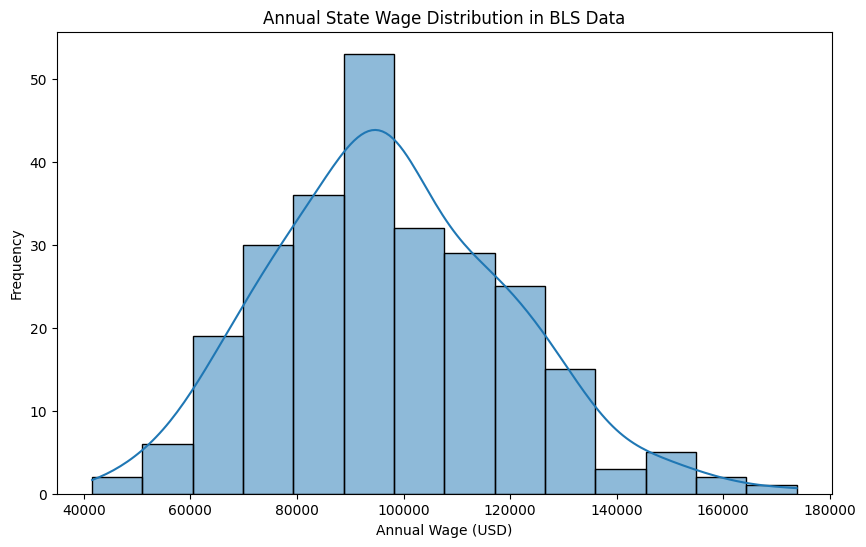

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(bls_df['AvgSalary'], kde=True)
plt.title("Annual State Wage Distribution in BLS Data")
plt.xlabel("Annual Wage (USD)")
plt.ylabel("Frequency")
plt.show()


Visualize Average Salary by State

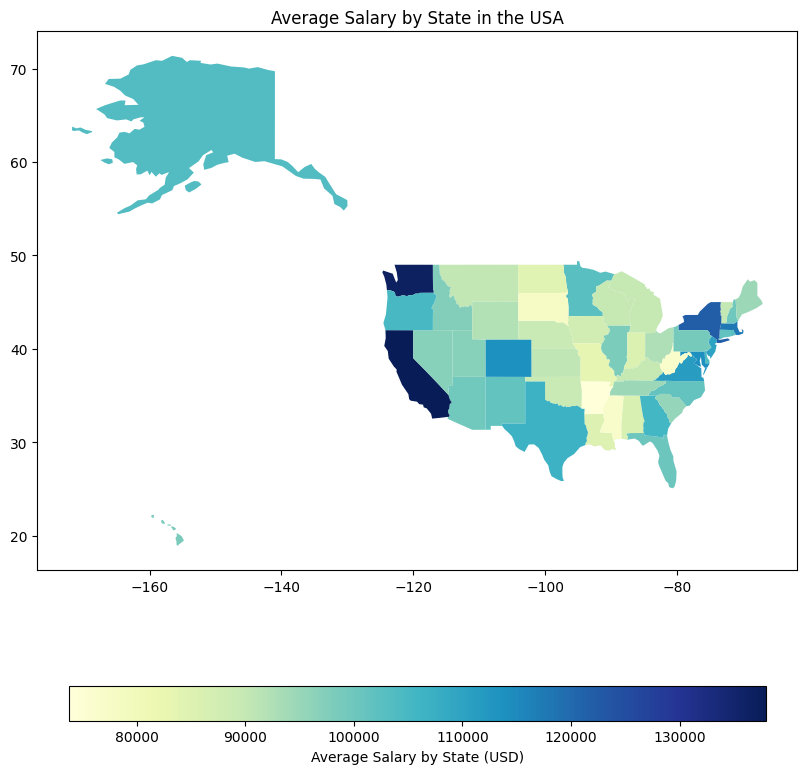

In [63]:
# Load your data (BLS data with 'State' and 'AvgSalary' columns)
bls_df = pd.read_csv("data/cleaned/Transformed_bls2023_dl.csv")

# Group by state and calculate average salary per state
state_salary = bls_df.groupby('State')['AvgSalary'].mean().reset_index()

# Load the USA states shapefile from your specified path
usa_states = gpd.read_file(r"C:/Users/topaz/geo/ne_110m_admin_1_states_provinces.shp")

# Filter to include only USA states (if necessary)
usa_states = usa_states[usa_states['admin'] == 'United States of America']

# Merge the salary data with the geospatial data
state_salary_map = usa_states.set_index('name').join(state_salary.set_index('State'))

# Plotting the map of average salary by state
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
state_salary_map.plot(column='AvgSalary', 
                      ax=ax, 
                      legend=True,
                      cmap="YlGnBu",  
                      legend_kwds={
                          'label': "Average Salary by State (USD)",
                          'orientation': "horizontal",
                          'shrink': 0.6,
                          'pad': 0.15  # Increase padding
                      })

plt.title("Average Salary by State in the USA")
plt.show()
